How level of education of a person can influence depression factor?

In [82]:
import pandas as pd

In [83]:
df = pd.read_excel("/Users/kirtananambiar/Desktop/ProjectAIT/MentalhealthData.xlsx", sheet_name=None)

In [84]:
print(df.keys())

dict_keys(['prevalence-by-mental-and-substa', 'depression-by-level-of-educatio', 'prevalence-of-depression-by-age', 'prevalence-of-depression-males-', 'suicide-rates-vs-prevalence-of-', 'number-with-depression-by-count'])


In [85]:
##Reading input files
depressionEducation = pd.read_csv("/Users/kirtananambiar/Desktop/ProjectAIT/EducationDepression.csv")

depressionCount = pd.read_excel("/Users/kirtananambiar/Desktop/ProjectAIT/MentalhealthData.xlsx", sheet_name="number-with-depression-by-count")

In [86]:
##finding missing values if any
depressionEducation.isna().sum()

COUNTRY              0
Country              0
ISC11A               0
ISCED-A 2011         0
SEX                  0
Gender               0
AGE                  0
Age                  0
PIAAC_CATEGORY       0
Category             0
INDICATOR            0
Indicator            0
MEASURE              0
Measure              0
YEAR                 0
Reference year       0
Value               26
Flag Codes        2782
Flags             2782
dtype: int64

In [87]:
##Data preprocessing 

##Selecting columns of interest
depressionEducation = depressionEducation[['Country','ISCED-A 2011','Gender','Age','Category','YEAR','Value']]
df = depressionEducation[depressionEducation['Gender'].isin(['Women','Men'])]

df = df[df['Category'].isin(['Employed','Active'])]
df = df[df['Age']!='25-64 years']

In [88]:
##Left join to get total population of depressed people

merged_data = pd.merge(df,depressionCount[depressionCount['Year']==2014],how="left",left_on=["Country","YEAR"],
            right_on=["Entity","Year"], suffixes=('', '_drop'))
merged_data.drop([col for col in merged_data.columns if 'drop' in col], axis=1, inplace=True)

merged_data = merged_data.rename(columns={"Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)": "Prevalence"})
merged_data = merged_data.drop(columns=['Code','Year','Entity','YEAR'])

In [89]:
#Checking for missing values and dropping the na values
merged_data.isna().sum()

merged_data = merged_data.dropna()

temp = merged_data 
merged_data.head()


,Country,ISCED-A 2011,Gender,Age,Category,Value,Prevalence
0,Austria,Below upper secondary education,Women,25-44 years,Employed,8.8432,315328.290351
1,Austria,Below upper secondary education,Men,25-44 years,Employed,2.7627,315328.290351
2,Austria,Below upper secondary education,Women,25-44 years,Active,10.6757,315328.290351
3,Austria,Below upper secondary education,Men,25-44 years,Active,13.7724,315328.290351
4,Austria,Upper secondary and post-secondary non-tertiar...,Women,25-44 years,Employed,5.3782,315328.290351


In [90]:
##Computing the toal population from percentage given for each country
temp['Value'] = merged_data['Value'].multiply(merged_data['Prevalence'])/100


Text(0, 0.5, 'Number')

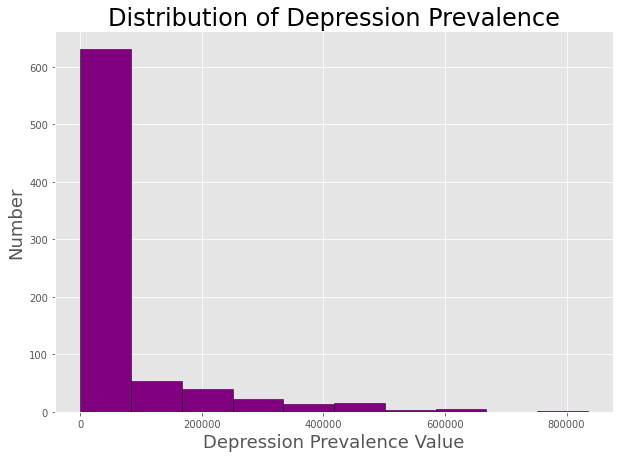

In [91]:
##Data exploratory analysis
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# histogram of the depresson value
temp.Value.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Depression Prevalence', size=24)
plt.xlabel('Depression Prevalence Value', size=18)
plt.ylabel('Number', size=18)



In [92]:
##As the data is skewed to the right, transforming data by log transformation and checking skewness value 
temp['logVal'] = np.log(temp.Value)

temp['sqrtVal'] = temp.Value**(1/2)

temp['rcpVal'] = 1/temp.Value

temp.skew(axis = 0, skipna = True)

##Skewness value between -0.5 and 0.5 is considered fairly symmetrical and hence log transformation 
##works best here

/var/folders/hb/qxp35y2s58b4krw7sw59zv7m0000gn/T/ipykernel_87943/4252169078.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp.skew(axis = 0, skipna = True)


Value         2.967258
Prevalence    1.236242
logVal        0.087794
sqrtVal       1.651541
rcpVal        4.392272
dtype: float64

Text(0, 0.5, 'Number')

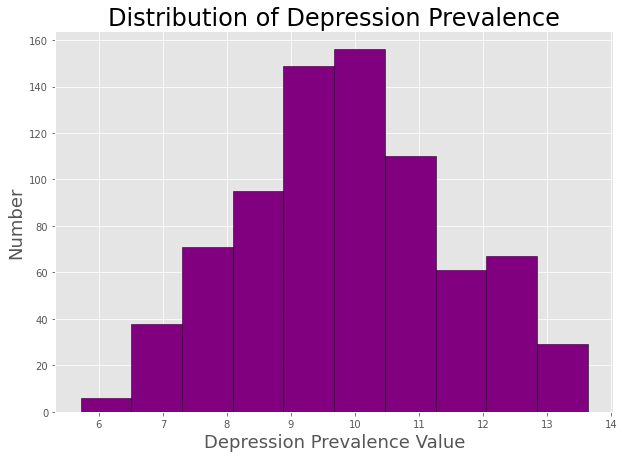

In [93]:
# histogram of the depresson value after transforming
temp.logVal.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Depression Prevalence', size=24)
plt.xlabel('Depression Prevalence Value', size=18)
plt.ylabel('Number', size=18)



In [94]:
t = temp.groupby(['ISCED-A 2011','Gender','Category']).sum('logVal')
t = t.reset_index()


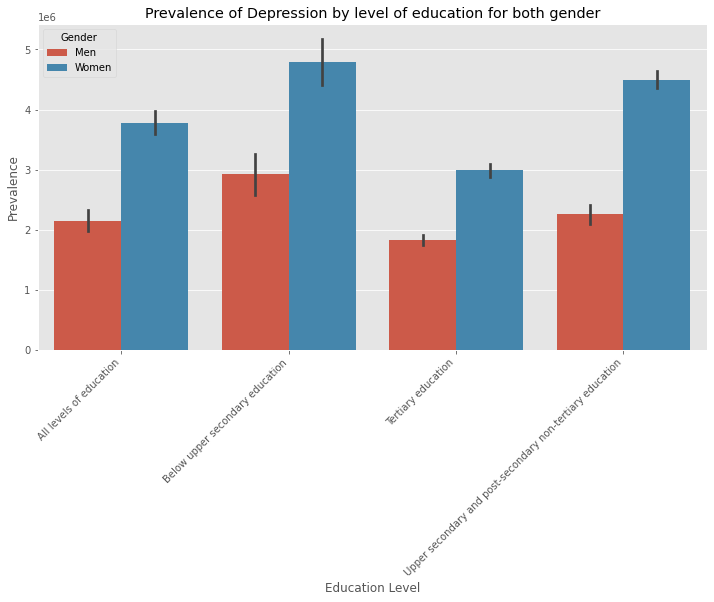

In [95]:
##Plotting graph for prevalence value both genders against level of education
import seaborn as sb
import matplotlib.pyplot as plt  

fig, ax = plt.subplots(figsize=(12, 6))
sb.barplot(x="ISCED-A 2011",
           y="Value",
           hue="Gender",
           data=t, ax=ax).set(title='Prevalence of Depression by level of education for both gender', 
                        xlabel='Education Level', ylabel='Prevalence')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()



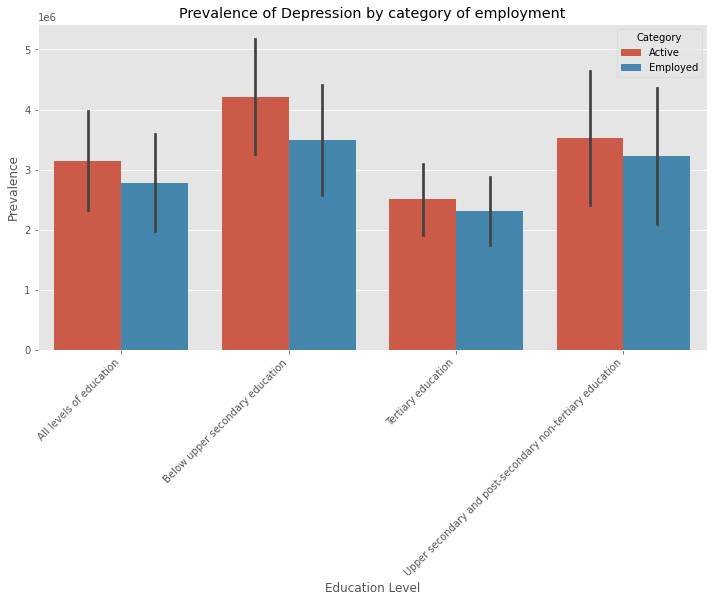

In [96]:
## ##Plotting graph for prevalence value both categories against level of education

fig, ax = plt.subplots(figsize=(12, 6))
sb.barplot(x="ISCED-A 2011",
           y="Value",
           hue="Category",
           data=t, ax=ax).set(title='Prevalence of Depression by category of employment', 
                        xlabel='Education Level', ylabel='Prevalence')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Inferences: 
People with tertiary level of education exhibited the lowest depression percentage. 
Tertiary is the highest level of education among the other two i.e. below upper-secondary and upper-secondary. Also, higher the level of education a person acquired, lower values of depression were observed from the graph. This indicates level of education and depression rates are inversely proportional to each other. This could be because education provides employment, fixed income, economic independence and this in turn boosts self-esteem leading to better mental health.

Further detailed analysis of the dataset as a whole shows in each level of education,
the employed group has the least factor of depression amongst actively seeking employment and
total number of people in that level. This indicates the employment is one factor in determining depression 
levels in an individual.

Infereneces:
Further detailed analysis of the dataset as a whole shows in each level of education,
the employed group has the least factor of depression amongst actively seeking employment and
total number of people in that level. This indicates the employment is one factor in determining depression 
levels in an individual.

In [97]:
#Understanding relation between variables using Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression


In [98]:
model = LinearRegression()

In [99]:
##Converting categorical data into levels for fitting into models

from sklearn.preprocessing import LabelEncoder
X = temp[['ISCED-A 2011']].values
education_level = LabelEncoder()
X[:, 0] = education_level.fit_transform(X[:, 0])

df_dummy = pd.get_dummies(temp, prefix='', prefix_sep='', 
                            columns=['Gender','Age','Category'])
df_dummy.drop(['Women','45-64 years','Active'], axis=1, inplace=True)

# # rename Gender_Male column
df_dummy.rename(columns={'Men': 'Gender','25-44 years':'Age'}, inplace=True)

df_dummy['Education_level'] = X[:, 0]



In [100]:
##Getting X and Y values to fit the model
x = df_dummy['logVal']

y = df_dummy[['Gender', 'Age','Employed','Education_level']]
x = x.values.reshape(-1, 1)

In [101]:
##Fit the model
model = model.fit(x,y)

In [102]:
##Check the rsquared value
r_sq = model.score(x, y)
r_sq


0.008216909029764519

In [103]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [104]:
# imports
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [105]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='logVal ~ Gender + Age + Employed + Education_level', data=df_dummy).fit()

# print the coefficients
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 logVal   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     7.163
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.89e-07
Time:                        16:21:02   Log-Likelihood:                -1461.3
No. Observations:                 782   AIC:                             2937.
Df Residuals:                     775   BIC:                             2969.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.2527      0.148     69.219      0.000       9.962      10.544
Education_level[T.1]     0.4125      0.161      2.563      0.011       0.097       0.728
Education_level[T.2]    -0.2459      0.158     -1.558      0.120      -0.556       0.064
Education_level[T.3]     0.0594      0.157      0.377      0.706      -0.250       0.369
Gender                  -0.5117      0.113     -4.541      0.000      -0.733      -0.291
Age                     -0.1814      0.113     -1.611      0.108      -0.403       0.040
Employed                -0.1626      0.113     -1.443      0.149      -0.384       0.059
==============================================================================
Omnibus:                       23.624   Durbin-Watson:                   0.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.361
Skew:                           0.092   Prob(JB):                      0.00207
Kurtosis:                       2.412   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
### SCIKIT-LEARN ###

###Creating dummy variables for category variables 

from sklearn.preprocessing import LabelEncoder
X = temp[['ISCED-A 2011']].values
education_level = LabelEncoder()
X[:, 0] = education_level.fit_transform(X[:, 0])

df = pd.get_dummies(temp, prefix='', prefix_sep='', 
                            columns=['Gender','Age','Category'])
df.drop(['Women','45-64 years','Active'], axis=1, inplace=True)

# # rename Gender_Male column
df.rename(columns={'Men': 'Gender','25-44 years':'Age'}, inplace=True)

df['Education_level'] = X[:, 0]




In [107]:
# create X and Y to fit the model
feature_cols = ['Gender', 'Age','Employed','Education_level']
X = df[feature_cols]
y = df.logVal



In [108]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (586, 4)
Training Labels Shape: (586,)
Testing Features Shape: (196, 4)
Testing Labels Shape: (196,)


In [109]:
#Creating Random Forest model for regression
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [110]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 1.37 degrees.


In [111]:
# Calculate mean absolute percentage error and accuracy of model
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 86.14 %.


In [114]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot


# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)

# Extracting the tree
tree_small = rf_small.estimators_[5]
                                  
# Saving the tree as image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_cols, rounded = True,
                precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('/Users/kirtananambiar/Desktop/ProjectAIT/small_tree.png');

In [115]:
# Calculating numerical feature importances
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_cols, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Education_level      Importance: 0.39
Variable: Gender               Importance: 0.27
Variable: Employed             Importance: 0.18
Variable: Age                  Importance: 0.17


In [116]:
### SCIKIT-LEARN ###

###Based on importance calculated for each feature, re-building the model on subset of features

##Creating dummy variables for category var

from sklearn.preprocessing import LabelEncoder
X = temp[['ISCED-A 2011']].values
education_level = LabelEncoder()
X[:, 0] = education_level.fit_transform(X[:, 0])

df = pd.get_dummies(temp, prefix='', prefix_sep='', 
                          columns=['Gender','Age','Category'])

df.drop(['Men'], axis=1, inplace=True)

df.rename(columns={'Women': 'Gender'}, inplace=True)

df['Education_level'] = X[:, 0]



##Subset of features
feature_cols = ['Gender','25-44 years','45-64 years','Education_level']
X = df[feature_cols]
y = df.logVal

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


##Model instantiation
rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Training model on training dataset
rf1.fit(X_train, y_train)

#Predicting the test data based on model created
predictions = rf1.predict(X_test)

# Calculating the absolute errors
errors = abs(predictions - y_test)

# Calculating mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


# Calculate percentage error 
ep = 100 * (errors / y_test)

# Calculating  accuracy
accuracy = 100 - np.mean(ep)
print('Accuracy:', round(accuracy, 2), '%.')



Training Features Shape: (586, 4)
Training Labels Shape: (586,)
Testing Features Shape: (196, 4)
Testing Labels Shape: (196,)
Mean Absolute Error: 1.27 degrees.
Accuracy: 86.45 %.
